# Su Kalitesi Açıklayıcı Veri Analizi


## INTRODUCTION

* Güvenli içme suyuna erişim sağlık için esastır, temel bir insan hakkıdır ve sağlığın korunmasına yönelik etkin politikanın bir bileşenidir. Bu, ulusal, bölgesel ve yerel düzeyde bir sağlık ve kalkınma sorunu olarak önemlidir.


![su.JPG]( https://i.nefisyemektarifleri.com/2018/04/16/japon-su-terapisi-gune-su-icerek-baslayin-ve-farki-hissedin.jpg )


##  Analysis content
 1. [Phyton Kütüphaneleri](#1)
 1. [Data Bilgileri](#2)
 1. [Read and Analyse Data](#3)
 1. [Dependent Variable Analysis](#4)
 1. [Corelation Between Features](#5)
 1. [Distribution of Features](#6)
 1. [Preprocessing: Missing Value Problem ](#7)
 1. [Preprocesssing: Train-Test Split and Normalization](#8)
 1. [Modelling: ](#9)
 1. [Visualize Desicion Tree](#10)

<a id="1"></a>
## Phyton Kütüphaneleri

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import precision_score,confusion_matrix 
from time import time


<a id="2"></a>
##  Data Bilgileri
1.**pH value:**
PH, suyun asit-baz dengesini değerlendirmede önemli bir parametredir. Aynı zamanda su durumunun asidik veya alkali durumunun göstergesidir. DSÖ, izin verilen maksimum pH sınırını 6,5 ila 8,5 arasında önermiştir. Mevcut araştırma aralıkları, DSÖ standartları aralığında olan 6,52–6,83 idi.

2.**Hardness(Sertlik):**
Sertlik esas olarak kalsiyum ve magnezyum tuzlarından kaynaklanır. Bu tuzlar, suyun içinden geçtiği jeolojik tortulardan çözülür. Suyun sertlik oluşturan malzeme ile temas halinde olduğu süre, ham suda ne kadar sertlik olduğunu belirlemeye yardımcı olur.

3.**Solids (Total dissolved solids - TDS)(Toplam çözünmüş katılar):**
Su, çok çeşitli inorganik ve bazı organik mineralleri veya potasyum, kalsiyum, sodyum, bikarbonatlar, klorürler, magnezyum, sülfatlar vb. içerir. Bu, su kullanımı için önemli bir parametredir. TDS değeri yüksek olan su, suyun yüksek oranda mineralize olduğunu gösterir. TDS için arzu edilen limit 500 mg/l ve maksimum limit 1000 mg/l olup içme amaçlı reçete edilmiştir.

4.**Chloramines(kloraminler):**
Klor ve kloramin, kamusal su sistemlerinde kullanılan başlıca dezenfektanlardır. Kloraminler en yaygın olarak içme suyunu arıtmak için klora amonyak eklendiğinde oluşur. İçme suyunda litre başına 4 miligrama (mg/L veya milyonda 4 parça (ppm)) kadar klor seviyeleri güvenli kabul edilir.

5.**Sulfate:**
Sülfatlar, minerallerde, toprakta ve kayalarda bulunan doğal olarak oluşan maddelerdir. Ortam havasında, yeraltı sularında, bitkilerde ve yiyeceklerde bulunurlar. Sülfatın başlıca ticari kullanımı kimya endüstrisindedir. 

6.**Conductivity(İletkenlik):**
Saf su, elektrik akımını iyi bir şekilde iletmez, aksine iyi bir yalıtkandır. İyon konsantrasyonundaki artış, suyun elektriksel iletkenliğini arttırır. Genel olarak, suda çözünmüş katıların miktarı elektriksel iletkenliği belirler. Elektriksel iletkenlik (EC), aslında bir çözeltinin akım iletmesini sağlayan iyonik sürecini ölçer. WHO standartlarına göre EC değeri 400 μS/cm'yi geçmemelidir.

7.**Organic_carbon:**
Kaynak sularındaki Toplam Organik Karbon (TOC), sentetik kaynakların yanı sıra çürüyen doğal organik maddelerden (NOM) gelir. TOC, saf sudaki organik bileşiklerdeki toplam karbon miktarının bir ölçüsüdür. US EPA'ya göre TOC olarak arıtılmış / içme suyunda < 2 mg/L ve arıtma için kullanılan kaynak suda < 4 mg/Lit.

8.**Trihalomethanes(Trihalometanlar):**
THM'ler, klor ile işlenmiş suda bulunabilen kimyasallardır. İçme suyundaki THM'lerin konsantrasyonu, sudaki organik madde seviyesine, suyu arıtmak için gereken klor miktarına ve arıtılan suyun sıcaklığına göre değişir. 80 ppm'e kadar THM seviyeleri içme suyunda güvenli kabul edilir.

9.**Turbidity(Bulanıklık):**
Suyun bulanıklığı, askıda bulunan katı madde miktarına bağlıdır. Suyun ışık yayma özelliklerinin bir ölçüsüdür ve test koloidal maddeye göre atık deşarj kalitesini belirtmek için kullanılır.

10.**Potability(İçilebilirlik):**
Suyun insan tüketimi için güvenli olup olmadığını gösterir; 1, İçilebilir anlamına gelir ve 0, İçilemez anlamına gelir.

<a id="3"></a>
## Read and Analyse Data

In [2]:
df = pd.read_csv('C:/Users/win10/Desktop/makine öğrenmesi/water_potability.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
df.iloc[1]

ph                     3.716080
Hardness             129.422921
Solids             18630.057858
Chloramines            6.635246
Sulfate                     NaN
Conductivity         592.885359
Organic_carbon        15.180013
Trihalomethanes       56.329076
Turbidity              4.500656
Potability             0.000000
Name: 1, dtype: float64

In [6]:
print("veri seti:", df.shape)

veri seti: (3276, 10)


In [7]:
#describe
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
#daa frame ile ilgili özellikler
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<a id="4"></a>
## Dependent Variable Analysis

In [10]:
d = pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, values="Potability",names = ["Note Potible","Potable"],hole=0.35,opacity=0.8,
             labels = {"label" :"Potability","Potability":"Number of samples"})
fig.update_layout(title=dict(text="Pie Chart of Potability Feature"))
fig.update_traces(textposition="outside",textinfo="percent+label")
fig.show()

0: içilemez, 1:içilebilir.

<a id="5"></a>
## Corelation Between Features

In [11]:
df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        -0.013013  -0.014449   
Solids               0.013831        0.010242        -0.009143   0.019546   
Chloramines         -0.020486       -0.012653         0.017084   0.002363   
Sulfate             -0.016121        0.030831        -0.030274  -0.011187   
Conductivity         1.000000        0.020966         0.001285   0.005798   
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308   
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145   
Turbidity            0.005798       -0.027308        -0.022145   1.000000   
Potability          -0.008128       -0.030001         0.007130   0.001581   

                 Potability  
ph                -0.003556  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.023577  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007130  
Turbidity          0.001581  
Potability         1.000000

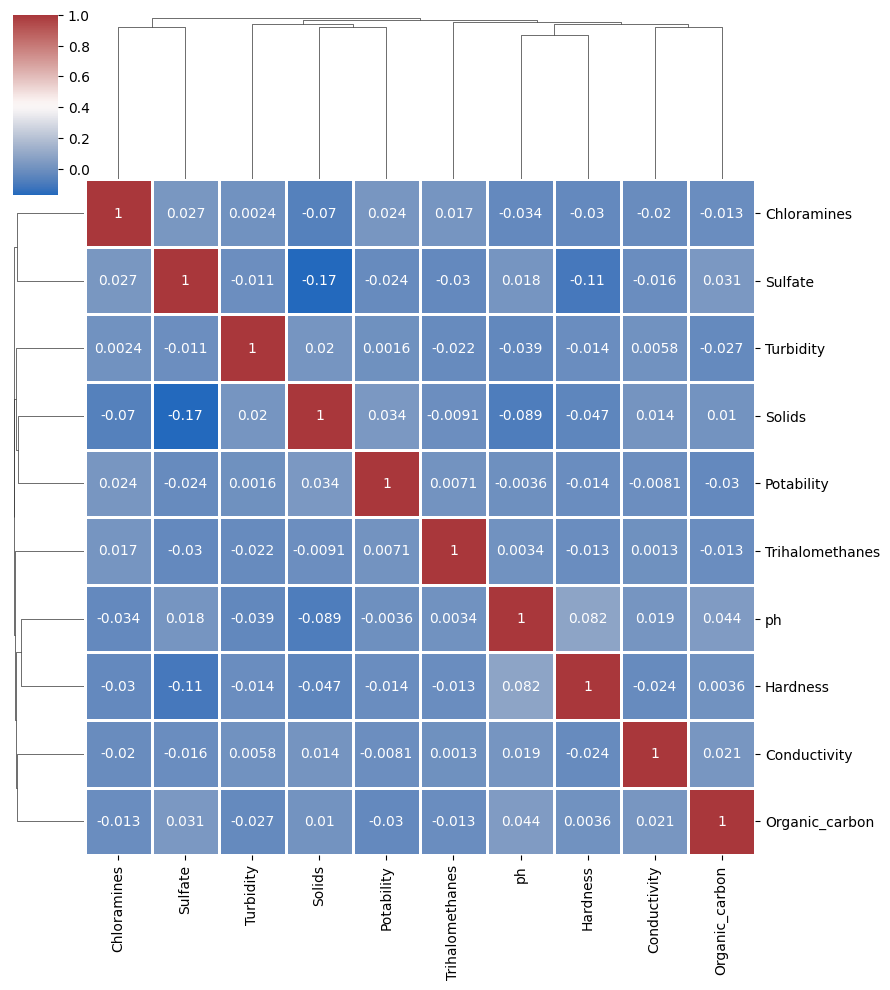

In [12]:
sns.clustermap(df.corr(), cmap="vlag", dendrogram_ratio = (0.1,0.2), annot =True, linewidths= .8,figsize=(9,10))
plt.show()

<a id="6"></a>
## Distribution of Features
histogram

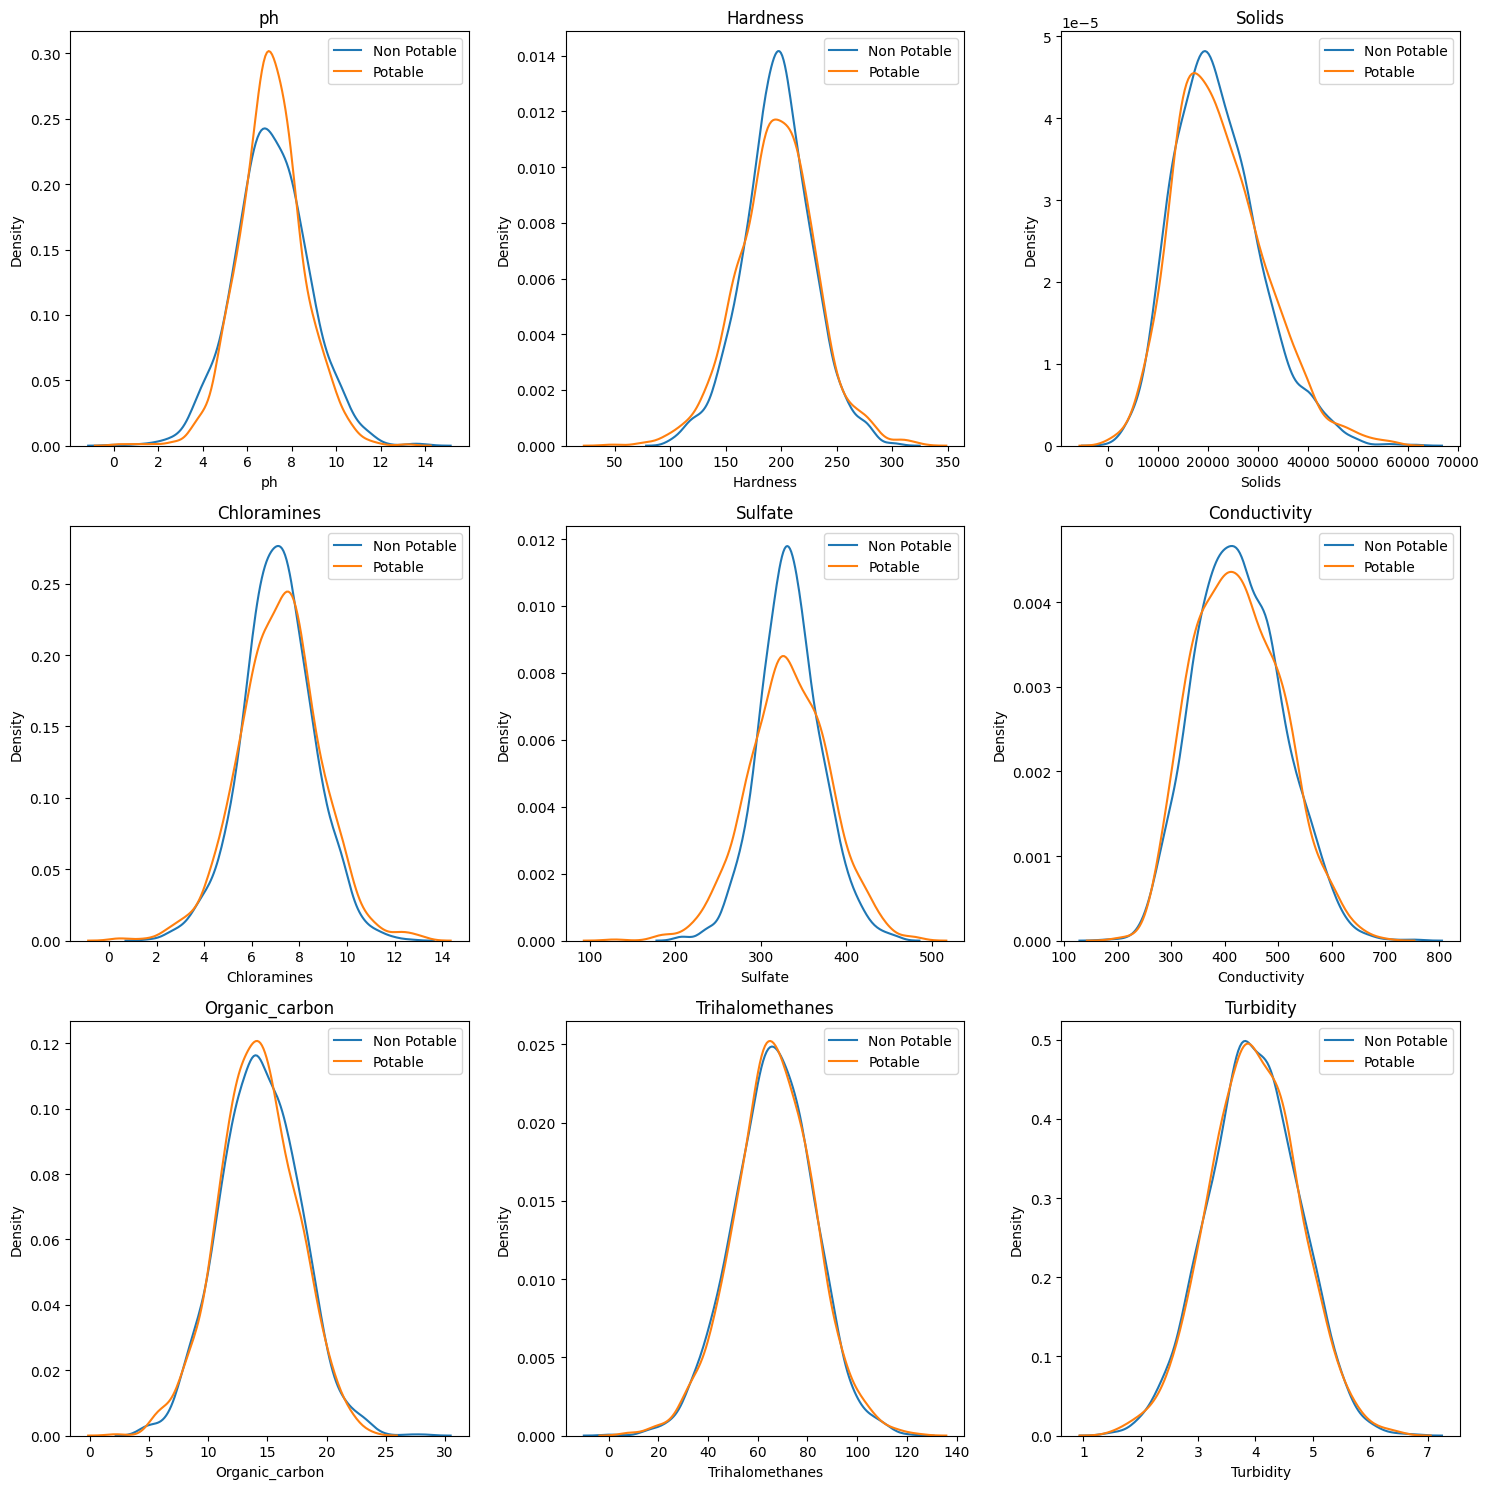

In [13]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize=(15,15))
for ax,col in enumerate(df.columns[:9]):
  plt.subplot(3,3, ax+1)
  plt.title(col)
  sns.kdeplot(x=non_potable[col],label="Non Potable")
  sns.kdeplot(x=potable[col],label="Potable")
  plt.legend()
plt.tight_layout()

<a id="7"></a>
## Preprocessing: Missing Value Problem 

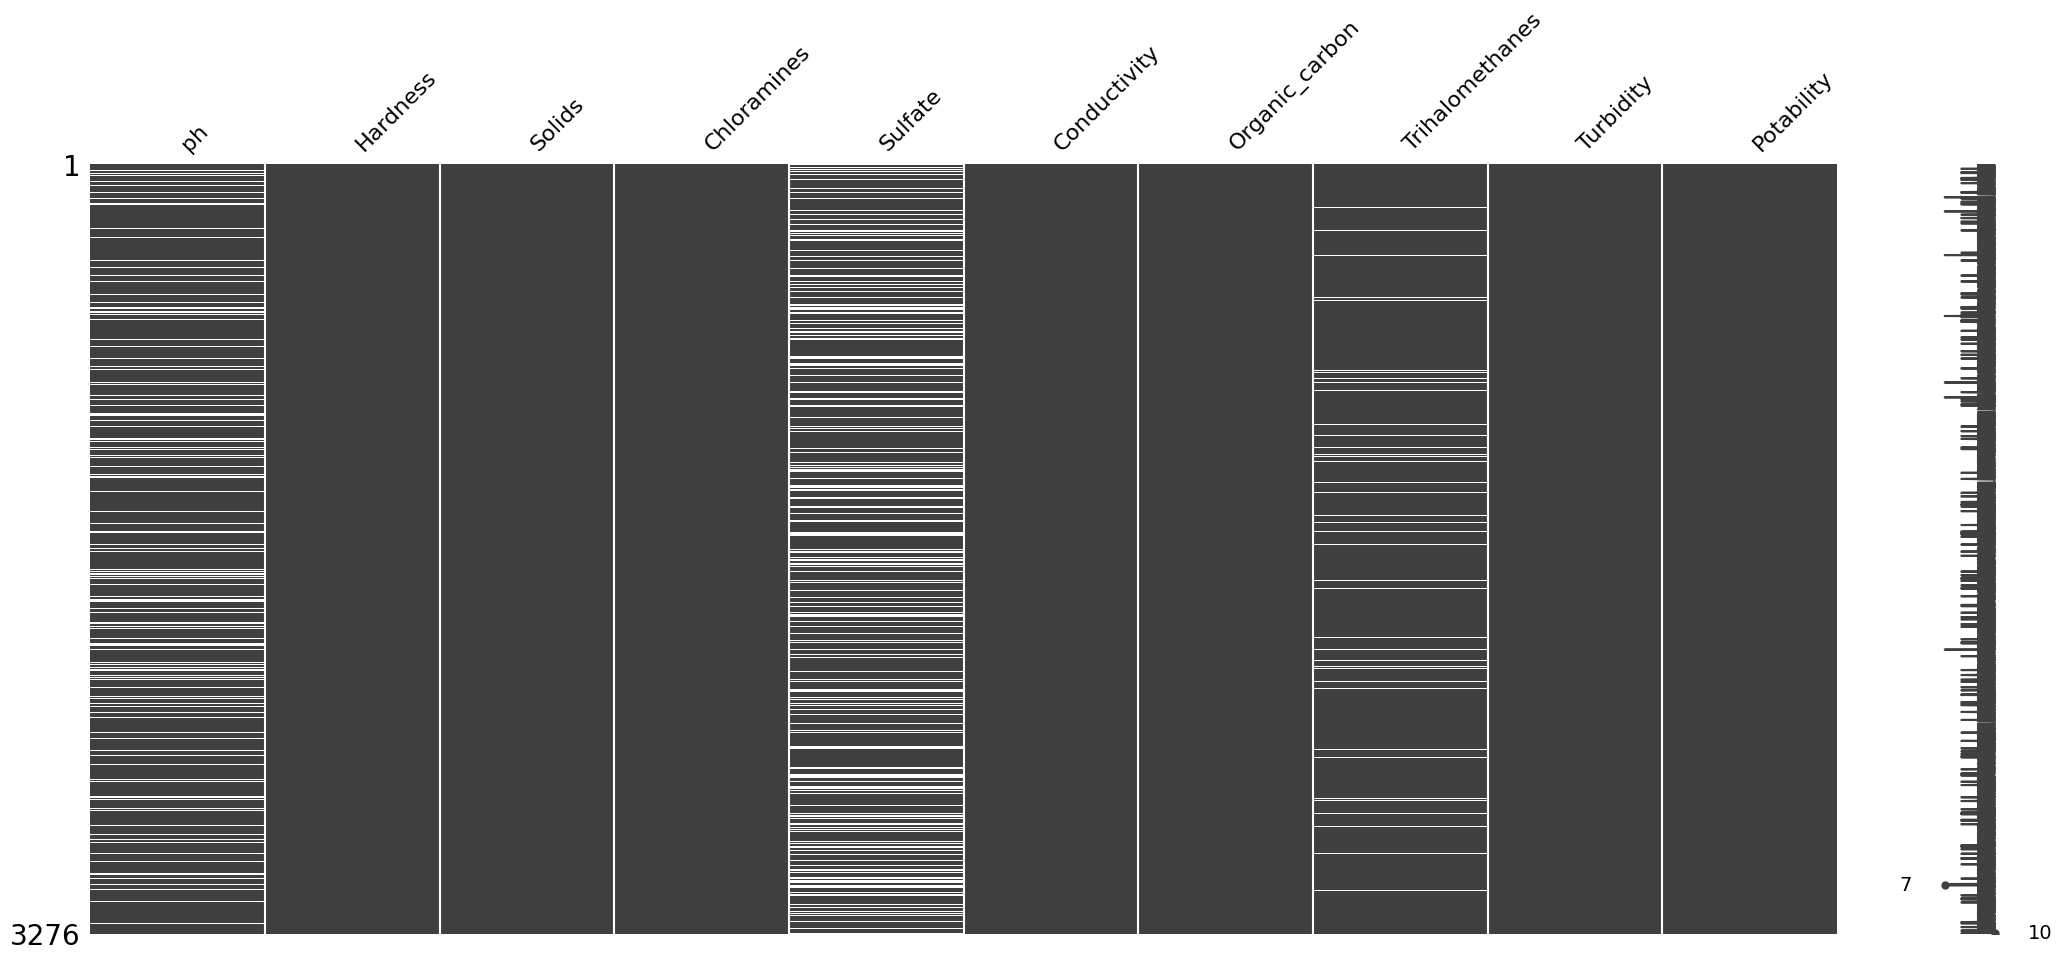

In [14]:
msno.matrix(df)
plt.show()

In [15]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [16]:
# handle missing value with avarage of features
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

In [17]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [18]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3271    False
3272    False
3273    False
3274    False
3275    False
Length: 3276, dtype: bool

C:\Users\win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='Potability', ylabel='count'>

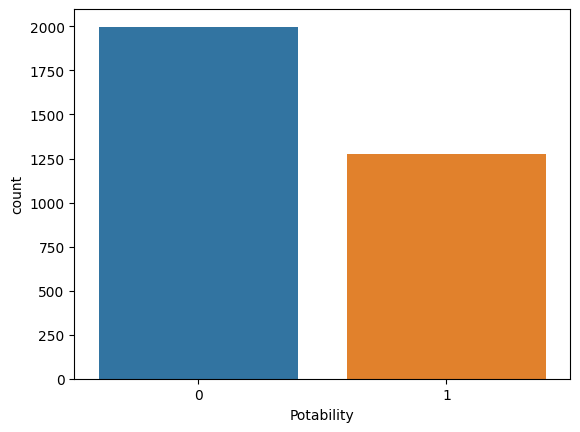

In [20]:
import seaborn as sns
sns.countplot(df['Potability'])

In [21]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<a id="8"></a>
## Preprocesssing: Train-Test Split and Normalization

In [22]:
X = df.drop("Potability", axis=1).values
y = df["Potability"].values

In [23]:
X

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [24]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [25]:
# train test split
from sklearn.model_selection  import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (2293, 9)
X_test (983, 9)
y_train (2293,)
y_test (983,)


In [26]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn import preprocessing

mm = preprocessing.MinMaxScaler()

In [27]:
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [28]:
X_train

array([[0.58443595, 0.46413849, 0.31723264, ..., 0.29879922, 0.44422354,
        0.59656604],
       [0.49082909, 0.50861985, 0.3158469 , ..., 0.57960357, 0.52697693,
        0.51623923],
       [0.55195865, 0.63298375, 0.30287529, ..., 0.16137954, 0.53495979,
        0.59591645],
       ...,
       [0.52715035, 0.674321  , 0.27159117, ..., 0.37121946, 0.74740437,
        0.67696203],
       [0.5736468 , 0.61160018, 0.29248052, ..., 0.3215493 , 0.63127089,
        0.3571337 ],
       [0.44311235, 0.26917349, 0.10470676, ..., 0.37597074, 0.54810638,
        0.53990345]])

# Scatter Plot 

C:\Users\win10\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



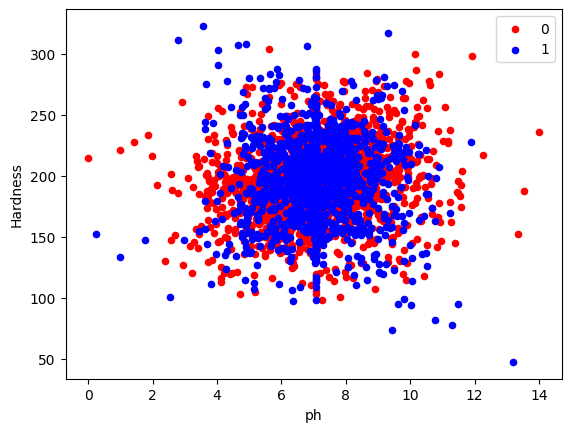

In [29]:
from matplotlib import pyplot as plt 
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('Potability')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter'
               ,x='ph', y='Hardness', label=key
               ,color=colors[key])
plt.show()

 <a id="9"></a>
 # MODELLING

## 1. Gaussian Naive Bayes

# 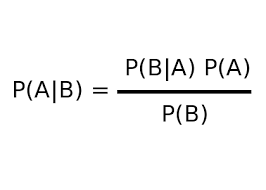

**NAIVE BAYES:**
Naive Bayes sınıflandırmasında sisteme belirli bir oranda öğretilmiş veri sunulur (Örn: 
100 adet). Öğretim için sunulan verilerin mutlaka bir sınıfı/kategorisi bulunmalıdır. 
Öğretilmiş veriler üzerinde yapılan olasılık işlemleri ile sisteme sunulan yeni test 
verileri, daha önce elde edilmiş olasılık değerlerine göre işletilir ve verilen test verisinin 
hangi kategoride olduğu tespit edilmeye çalışılır.

**Gaussian Naive Bayes:** Eğer özelliklerimiz sürekli değer(continuous value) ise bu değerlerin bir gauss dağılımı veya diğer bir değişle normal dağılımdan örneklendiğini varsayıyoruz.

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb0=time()

In [31]:
 gnb.fit(X_train, y_train.ravel())   

GaussianNB()

In [32]:
gnb_time=time()-gnb0
print("gaussian naive bayes time:", gnb_time)


gaussian naive bayes time: 0.05059456825256348


In [33]:
tahminler = gnb.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,precision_score
accuracy_gnb = accuracy_score(y_test, tahminler)
accuracy_gnb

0.6286876907426246

<AxesSubplot: title={'center': 'Confusion Matrix for GaussianNaiveBayes'}, xlabel='Predicted label', ylabel='True label'>

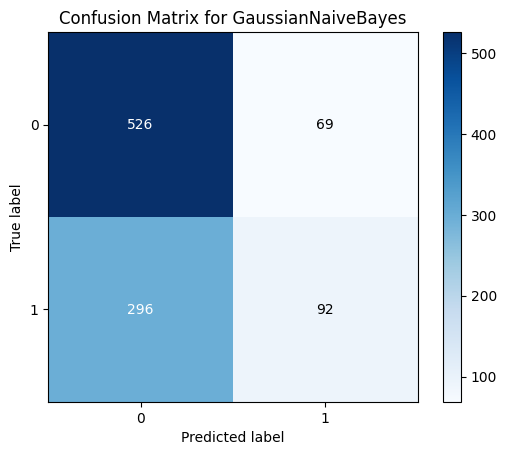

In [35]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, tahminler, normalize=False, title = 'Confusion Matrix for GaussianNaiveBayes')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tahminler))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74       595
           1       0.57      0.24      0.34       388

    accuracy                           0.63       983
   macro avg       0.61      0.56      0.54       983
weighted avg       0.61      0.63      0.58       983



### ROC EĞRİSİ - Gaussian Naive Bayes 

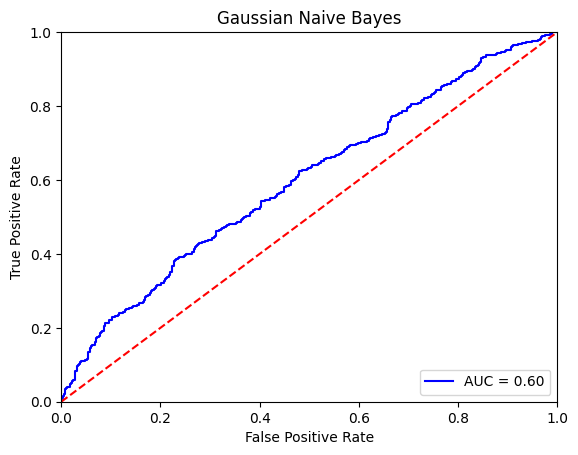

In [37]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
tahminler = gnb.predict_proba(X_test)
tahminler= tahminler[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tahminler)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Gaussian Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2.Bernoulli Naive Bayes

**Bernoulli Naive Bayes:** Tahminler sadece boolean(ikili) şekildedir. Evet/Hayır, Spam/Spam Değil, 1/0, Var/Yok gibi.

In [38]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize= 0.0)
bnb0=time()

In [39]:
bnb.fit(X_train, y_train.ravel())
bnb_time=time()-bnb0
print("bernoulli naive bayes time:", bnb_time)


bernoulli naive bayes time: 0.08701896667480469


In [40]:
bernollitahmin = bnb.predict(X_test)

In [41]:
Accuracy_bnb = accuracy_score(y_test, bernollitahmin)
Accuracy_bnb 

0.6063072227873856

<AxesSubplot: title={'center': 'Bernoulli Naive Bayes Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

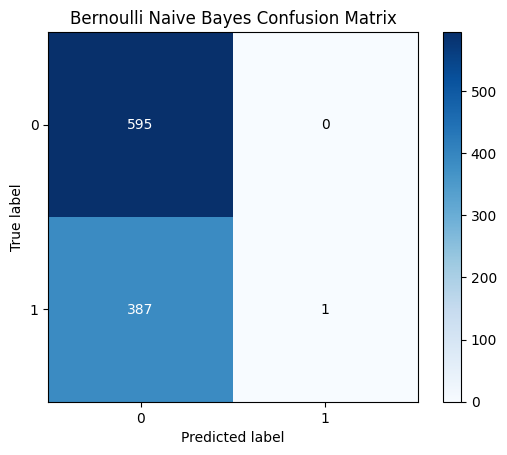

In [42]:
skplt.metrics.plot_confusion_matrix(y_test, bernollitahmin, normalize=False, title = 'Bernoulli Naive Bayes Confusion Matrix')

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,bernollitahmin))

              precision    recall  f1-score   support

           0       0.61      1.00      0.75       595
           1       1.00      0.00      0.01       388

    accuracy                           0.61       983
   macro avg       0.80      0.50      0.38       983
weighted avg       0.76      0.61      0.46       983



# Bernolli Naive Bayes ROC EĞRİSİ

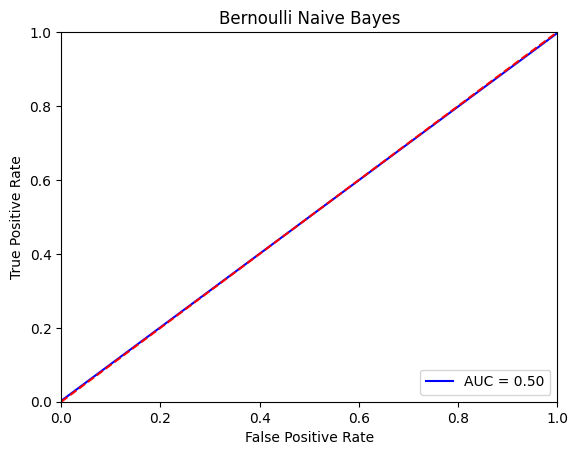

In [44]:
# calculate the fpr and tpr for all thresholds of the classification
bernollitahmin = bnb.predict_proba(X_test)
bernollitahmin= bernollitahmin[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, bernollitahmin)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Bernoulli Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3. Logistic Regression

![reg.JPG]( https://devopedia.org/images/article/305/3195.1610178097.png  )

**Lojistik regresyon:** İki veri faktörü arasındaki ilişkileri bulmak için matematikten yararlanan bir veri analizi tekniğidir. Lojistik regresyon, daha sonra diğerine dayalı bu faktörlerden birinin değerini tahmin etmek için bu ilişkiyi kullanır. Tahminin genellikle evet ya da hayır gibi sınırlı sayıda sonucu vardır.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg =  LogisticRegression(solver='lbfgs', max_iter=3000)
logreg0=time()
logreg.fit(X_train, y_train.ravel())
logreg_time=time()-logreg0
print("lojistik regresyon time:", logreg_time)


lojistik regresyon time: 0.0487370491027832


In [46]:
logtahmin = logreg.predict(X_test)
Accuracy_logreg = accuracy_score(y_test, logtahmin)
Accuracy_logreg


0.6052899287894201

<AxesSubplot: title={'center': 'Confusion Matrix for GBC'}, xlabel='Predicted label', ylabel='True label'>

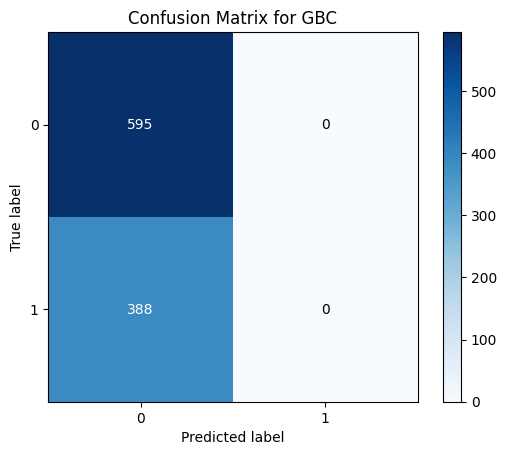

In [47]:
skplt.metrics.plot_confusion_matrix(y_test, logtahmin, normalize=False, title = 'Confusion Matrix for GBC')

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logtahmin))

              precision    recall  f1-score   support

           0       0.61      1.00      0.75       595
           1       0.00      0.00      0.00       388

    accuracy                           0.61       983
   macro avg       0.30      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983



C:\Users\win10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\win10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\win10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### ROC EĞRİSİ - LOGISTIC REGRESYON

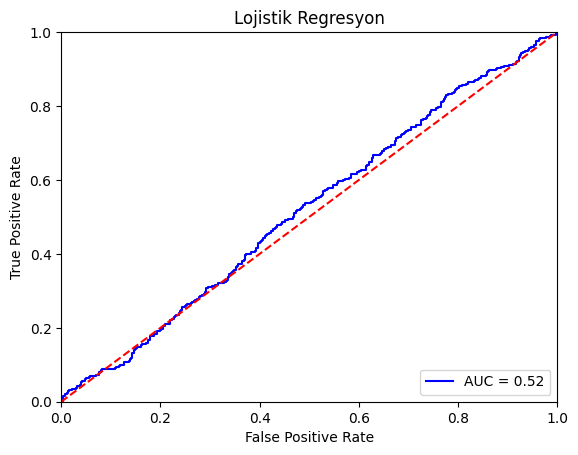

In [49]:
# calculate the fpr and tpr for all thresholds of the classification
logtahmin = logreg.predict_proba(X_test)
logtahmin= logtahmin[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, logtahmin)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Lojistik Regresyon')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 4. K-Nearest Neighbour 

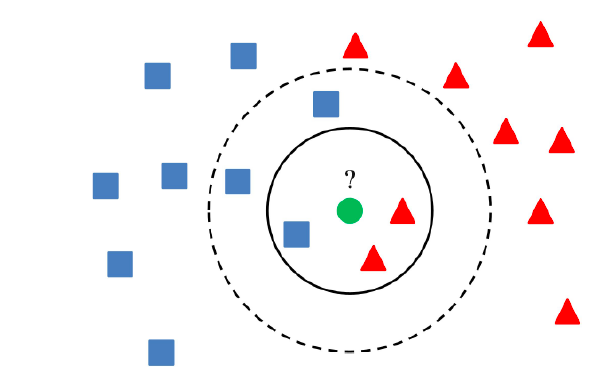

**K-Nearest Neighbour:** Sınıfı bilinmeyen verilerin, eğitim setindeki diğer veriler ile karşılaştırılıp bir uzaklık 
ölçümü gerçekleştirilmesi sonucu hesaplanan uzaklığa göre henüz bir sınıfa atanamamış 
verinin, en ideal (optimal) sınıfa atanarak sınıflandırılması olarak ifade edilmektedir.


In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn0=time()
knn.fit(X_train, y_train)
knn_time=time()-knn0
print("knn time:", knn_time)


knn time: 0.015691518783569336


In [51]:
tahminknn = knn.predict(X_test)


C:\Users\win10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [52]:
accuracy_knn = accuracy_score(y_test, tahminknn)
accuracy_knn

0.6256358087487284

<AxesSubplot: title={'center': 'Confusion Matrix for GBC'}, xlabel='Predicted label', ylabel='True label'>

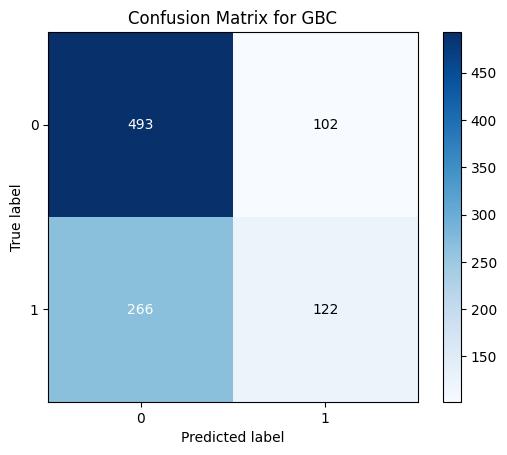

In [53]:
skplt.metrics.plot_confusion_matrix(y_test, tahminknn, normalize=False, title = 'Confusion Matrix for GBC')

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tahminknn))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       595
           1       0.54      0.31      0.40       388

    accuracy                           0.63       983
   macro avg       0.60      0.57      0.56       983
weighted avg       0.61      0.63      0.60       983



### ROC EĞRİSİ KNN 

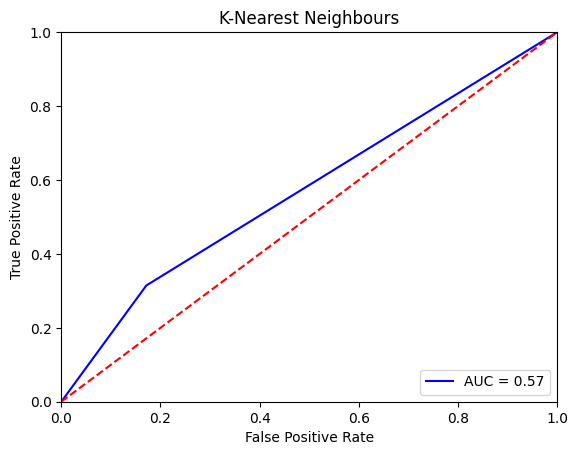

In [55]:
# calculate the fpr and tpr for all thresholds of the classification
knntahmin = knn.predict_proba(X_test)
knntahmin= knntahmin[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tahminknn)
roc_auc = metrics.auc(fpr, tpr)


plt.title('K-Nearest Neighbours')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 5. Decision Tree

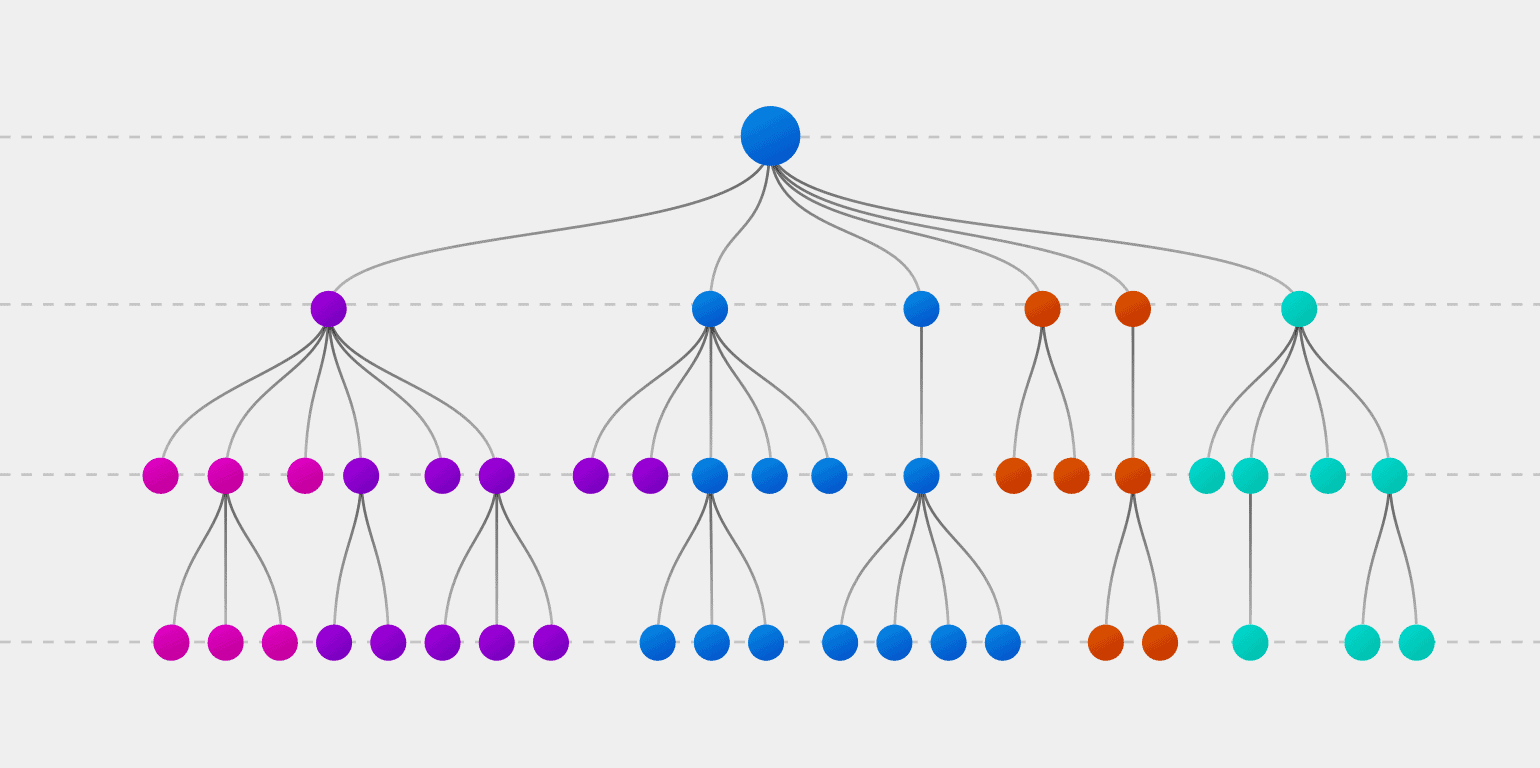

**Decision Tree:** Bir karar ağacı, çok sayıda kayıt içeren bir veri kümesini, bir dizi karar kuralları 
uygulayarak daha küçük kümelere bölmek için kullanılan bir yapıdır. Yani basit karar 
verme adımları uygulanarak, büyük miktarlardaki kayıtları, çok küçük kayıt gruplarına 
bölerek kullanılan bir yapıdır.


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
modeldt= (DecisionTreeClassifier(max_depth =3))
dt0=time()

In [57]:
modeldt.fit(X_train, y_train.ravel())
dt_time=time()-dt0
print("decision tree time:", dt_time)

tahmindt = modeldt.predict(X_test) #prediction

accuracy_dt = accuracy_score(y_test, tahmindt)
accuracy_dt

decision tree time: 0.04138588905334473


0.62970498474059

<AxesSubplot: title={'center': 'Confusion Matrix for DecisionTreeClassifier'}, xlabel='Predicted label', ylabel='True label'>

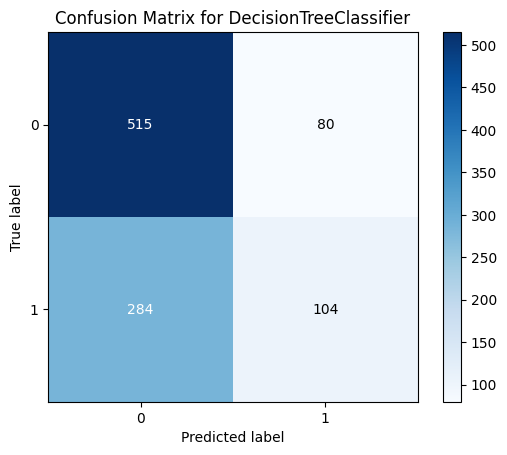

In [58]:
skplt.metrics.plot_confusion_matrix(y_test, tahmindt, normalize=False, title = 'Confusion Matrix for DecisionTreeClassifier')

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tahmindt))

              precision    recall  f1-score   support

           0       0.64      0.87      0.74       595
           1       0.57      0.27      0.36       388

    accuracy                           0.63       983
   macro avg       0.60      0.57      0.55       983
weighted avg       0.61      0.63      0.59       983



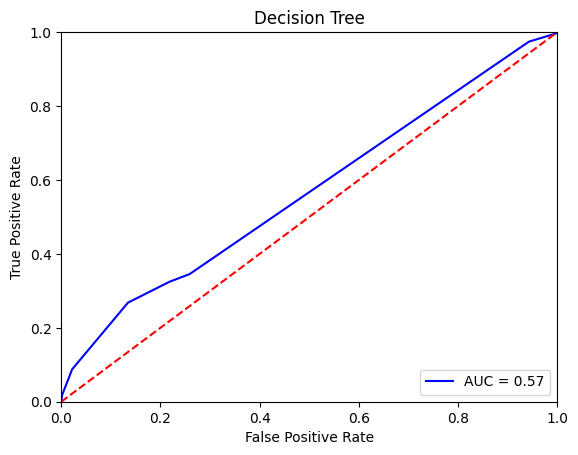

In [60]:
 #calculate the fpr and tpr for all thresholds of the classification
tahmindt = modeldt.predict_proba(X_test)
tahmindt= tahmindt[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tahmindt)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id="10"></a>
## Visualize Decision Tree

In [61]:
from sklearn import tree
text_representation = tree.export_text(modeldt)
text_representation

'|--- feature_4 <= 0.44\n|   |--- feature_2 <= 0.40\n|   |   |--- feature_0 <= 0.57\n|   |   |   |--- class: 0\n|   |   |--- feature_0 >  0.57\n|   |   |   |--- class: 1\n|   |--- feature_2 >  0.40\n|   |   |--- feature_5 <= 0.22\n|   |   |   |--- class: 0\n|   |   |--- feature_5 >  0.22\n|   |   |   |--- class: 1\n|--- feature_4 >  0.44\n|   |--- feature_4 <= 0.67\n|   |   |--- feature_5 <= 0.29\n|   |   |   |--- class: 0\n|   |   |--- feature_5 >  0.29\n|   |   |   |--- class: 0\n|   |--- feature_4 >  0.67\n|   |   |--- feature_0 <= 0.56\n|   |   |   |--- class: 1\n|   |   |--- feature_0 >  0.56\n|   |   |   |--- class: 0\n'

In [62]:
dt_clf = modeldt
dt_clf

DecisionTreeClassifier(max_depth=3)

In [63]:
df.columns.tolist()[:-1]

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

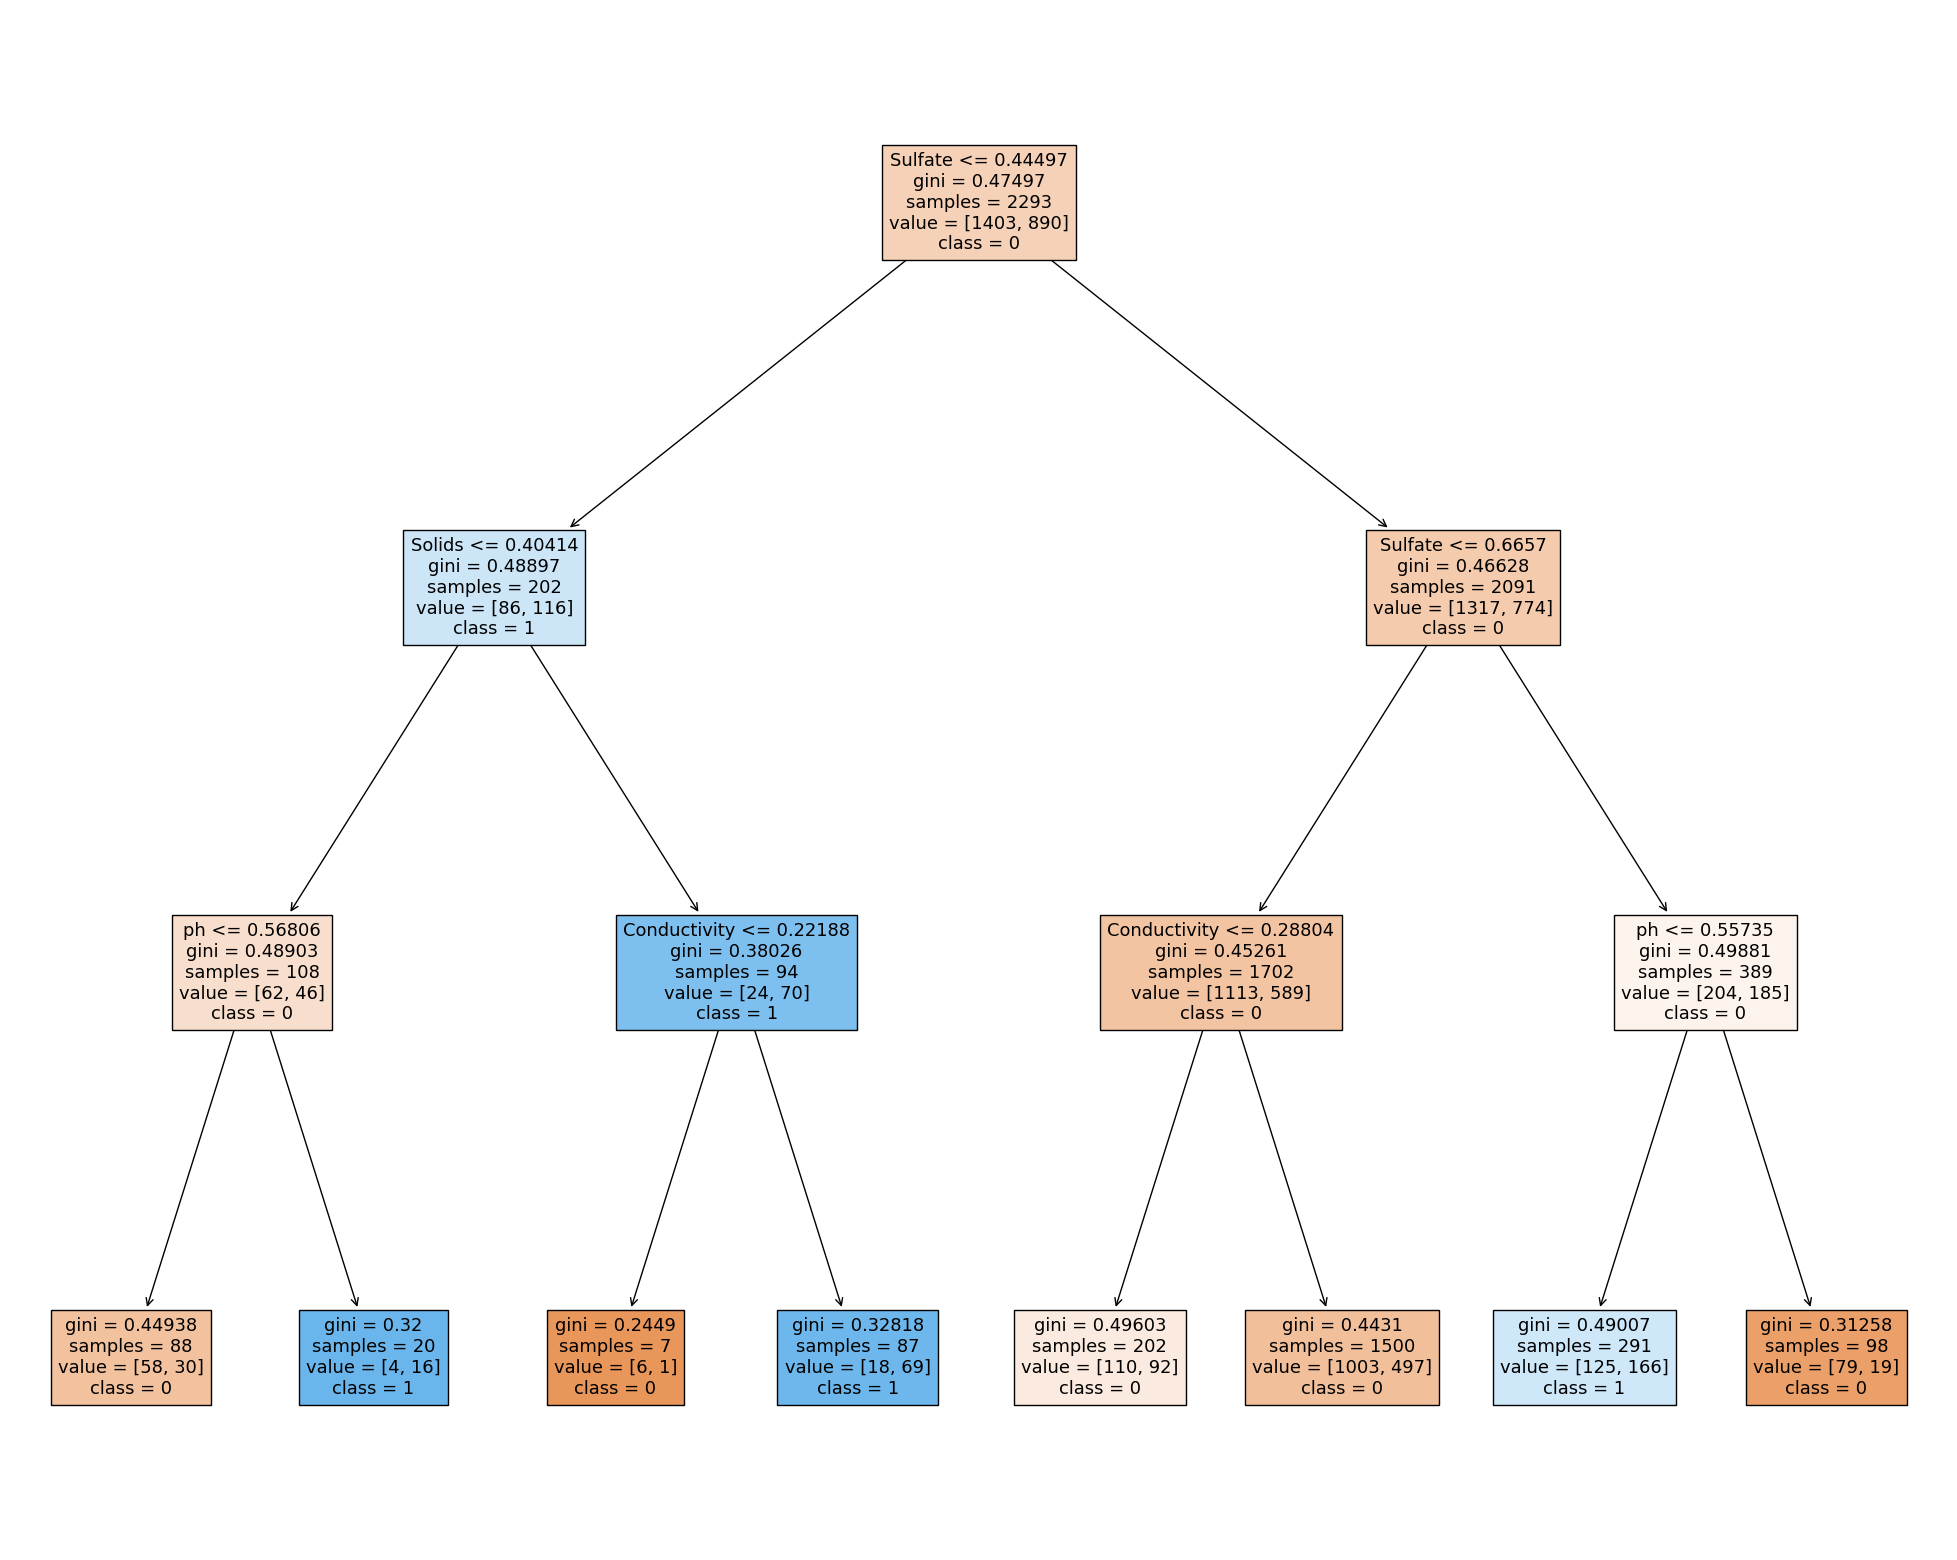

In [64]:
plt.figure(figsize = (25,20))
tree.plot_tree(dt_clf,
              feature_names = df.columns.tolist()[:-1],
              class_names = ["0","1"],
              filled = True,
              precision = 5
              )
plt.show()

## 6. Random Forest Classifier

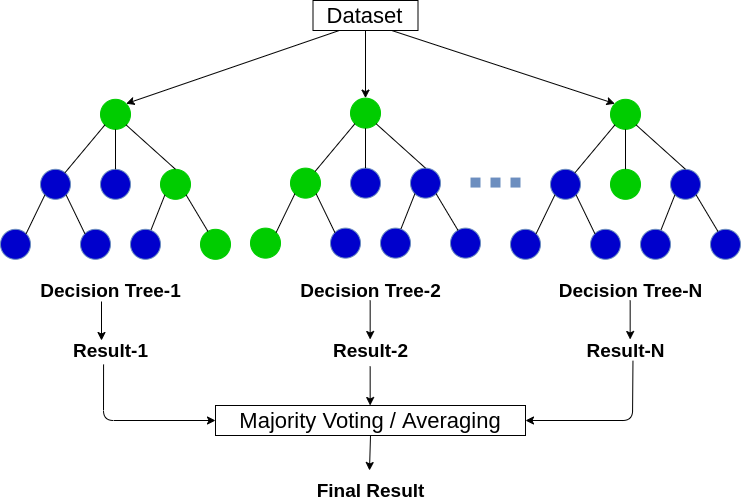

**Random Forest (Rastgele Orman) algoritması:** Birden çok karar ağacı üzerinden her bir karar ağacını farklı bir gözlem örneği üzerinde eğiterek çeşitli modeller üretip, sınıflandırma oluşturmanızı sağlamaktadır.

In [65]:
modelrf = RandomForestClassifier(n_estimators=100)
rf0=time()

In [66]:
modelrf.fit(X_train, y_train.ravel())
rf_time=time()-rf0
print("random forest time:", rf_time)
tahminrf= modelrf.predict(X_test)
accuracy_rf = accuracy_score(y_test, tahminrf)
accuracy_rf

random forest time: 2.0503311157226562


0.6531027466937945

<AxesSubplot: title={'center': 'Confusion Matrix for RandomForestClassifier'}, xlabel='Predicted label', ylabel='True label'>

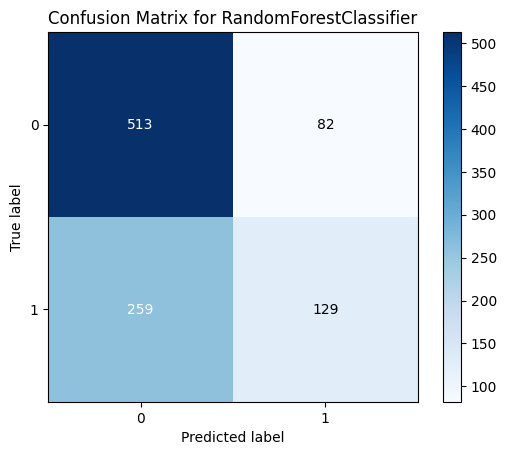

In [67]:
skplt.metrics.plot_confusion_matrix(y_test, tahminrf, normalize=False, title = 'Confusion Matrix for RandomForestClassifier')

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tahminrf))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75       595
           1       0.61      0.33      0.43       388

    accuracy                           0.65       983
   macro avg       0.64      0.60      0.59       983
weighted avg       0.64      0.65      0.62       983



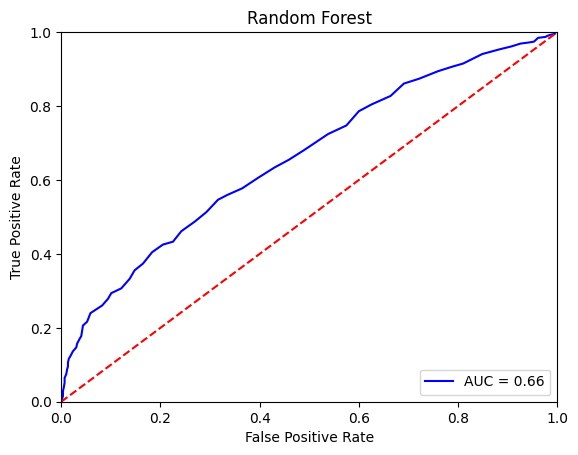

In [69]:
# calculate the fpr and tpr for all thresholds of the classification
tahminrf = modelrf.predict_proba(X_test)
tahminrf= tahminrf[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tahminrf)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Sonuçların Karşılaştırılması

In [70]:
modeller = [
    gnb,
    bnb, 
    logreg,
    knn,
    modeldt,
    modelrf
]

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
GaussianNB:
Accuracy: 62.8688%
----------------------------
BernoulliNB:
Accuracy: 60.6307%
----------------------------
LogisticRegression:
Accuracy: 60.5290%
----------------------------
KNeighborsClassifier:
Accuracy: 62.5636%
----------------------------
DecisionTreeClassifier:
Accuracy: 62.9705%
----------------------------
RandomForestClassifier:
Accuracy: 65.3103%


C:\Users\win10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



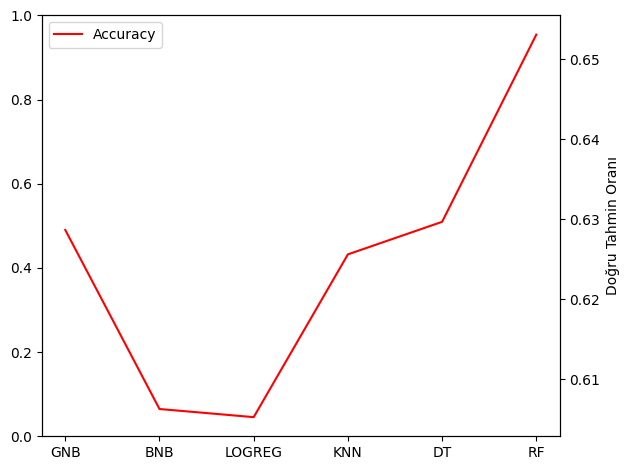

In [71]:
fig, ax1 = plt.subplots()
objects = ['GNB', 'BNB','LOGREG','KNN','DT','RF',]
y_pos = np.arange(len(objects))
performance_acc = [accuracy_gnb, Accuracy_bnb, Accuracy_logreg,accuracy_knn,accuracy_dt,accuracy_rf]
ax2 = ax1.twinx()
ax2.set_ylabel('Doğru Tahmin Oranı') 
ax2.plot(y_pos, performance_acc, color='red')
plt.xticks(y_pos, objects)
fig.tight_layout() 
plt.legend(['Accuracy'], loc='upper left')
plt.show()

# Çalışma Zamanlarının Karşılaştırılması

Algoritmaların Çalışma Zamanları 0.05059456825256348
Algoritmaların Çalışma Zamanları 0.08701896667480469
Algoritmaların Çalışma Zamanları 0.0487370491027832
Algoritmaların Çalışma Zamanları 0.015691518783569336
Algoritmaların Çalışma Zamanları 0.04138588905334473
Algoritmaların Çalışma Zamanları 2.0503311157226562


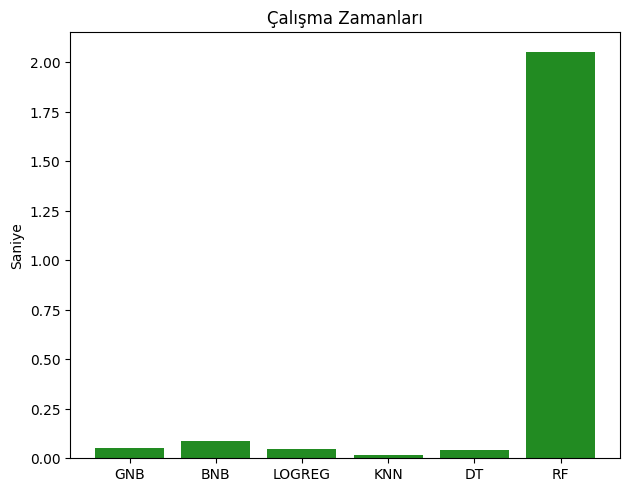

In [93]:
fig, ax1 = plt.subplots()
objects = ['GNB', 'BNB','LOGREG','KNN','DT','RF',]
y_pos = np.arange(len(objects))
performance_time = [gnb_time, bnb_time, logreg_time, knn_time, dt_time, rf_time]

for row in range(len(performance_time)):
 print("Algoritmaların Çalışma Zamanları", performance_time[row] )
ax1.set_ylabel('Saniye')
ax1.bar(y_pos, performance_time, color='forestgreen')
ax1.tick_params(axis='y')
plt.xticks(y_pos, objects)
fig.tight_layout() 
plt.title('Çalışma Zamanları')
plt.show()